### TO-DO
1. Add in matplotlib to side panel -- COMPLETE
2. Make fake graph with random sliders and boxes and whatever to change the graph -- WIP
3. Integrate it into the main editor instance
4. Connect internal model values with the sliders and graph and make it "real"

In [1]:
%matplotlib inline
import jupyterlab_nodeeditor as jlne
from yggdrasil import yamlfile
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import bqplot as bq

In [2]:
filename = "X:\College\Grad School\Research\gc-Xyzic\jupyterlab_nodeeditor\examples\model_example.yml"
model_set = yamlfile.parse_yaml(filename, model_only=True)
model_sets = jlne.parse_yggdrasil_yaml(filename)

schema = yamlfile.get_schema()
socket_types = tuple(schema.form_schema['definitions']['schema']['definitions']['simpleTypes']['enum'])

ne = jlne.NodeEditor(socket_types = socket_types)

In [3]:
ne.socket_types = ('Temperature', 'Rainfall', 'Delta Time', 'Results')
ne.add_component(
    {"inputs": [
                {'title': 'Temperature Morning', 'key': 'temp1', 'socket_type': 'Temperature'},
                {'title': 'Temperature Afternoon', 'key': 'temp2', 'socket_type': 'Temperature'},
                {'title': 'Temperature Evening', 'key': 'temp3', 'socket_type': 'Temperature'}
                ],
     "outputs": [
                {'title': 'Results', 'key': 'results', 'socket_type': 'Temperature'}
                ],
     "title": "Temperature Averaging"
})

In [4]:
ne

In [6]:
# Children[0] is an ipywidget label
# "Inputs" is a VBox as is "Outputs"
ne.node_editor.nodes[0].display_element.children[0].value = "Test Name Node 1"

In [7]:
m = widgets.FloatSlider(value = 0.0, min = -2.0, max = 2.0, step = 0.1)
b = widgets.FloatSlider(value = 5.0, min = 0.0, max = 10.0, step = 0.1)
ne.node_editor.nodes[0].display_element.children += (m,)
ne.node_editor.nodes[0].display_element.children += (b,)

In [8]:
# Work on the plot here
# Open initial sample plot png
with open("test.png", "rb") as f:
    image = f.read()
    plotimg = widgets.Image(value = image, format = "png")

In [9]:
ne.node_editor.nodes[0].display_element.children += (plotimg,)

In [10]:
# # Test it out
# with open("slope.png", "rb") as test:
#     new_plot = test.read()
#     plotimg.value = new_plot

In [11]:
def update_plot(node_editor_instance = ne, slope_slider = m, intercept_slider = b):
    fig, ax = plt.subplots()
    ax.set(xlabel='x', ylabel='y', title = "Simple Test Graph")
    ax.grid()
    x = np.linspace(-10, 10, num=1000)
    ax.plot(x, slope_slider.value * x + intercept_slider.value)
    ax.set_ylim(0, 10)
    fig.savefig("slope.png")
    
    with open("slope.png", "rb") as f:
        new_plot = f.read()
        plotimg.value = new_plot

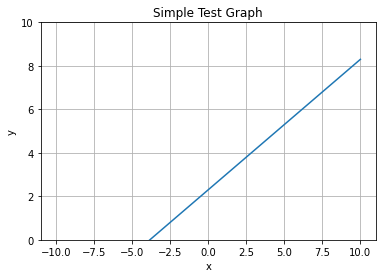

In [13]:
update_plot()